The objective of this project is to create a model that classifies if you will have a match given a certain set of attributes (attractiveness, sincerity etc) from yourself and your expected partner. This is based on Anna Montoya's dataset from : https://www.kaggle.com/annavictoria/speed-dating-experiment/home

In [46]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt

from sklearn.preprocessing import label_binarize

%matplotlib inline

In [2]:
#Import the data, I had to use a different encoding scheme apparently
df = pd.read_csv('C:\\Users\\john.osorio\\Desktop\\BLACK CAT\\Capstone Project\\speed-dating-experiment\\Speed Dating Data.csv', 
                 encoding = "ISO-8859-1")

In [3]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [26]:
#There are just too many null values
df.isnull().sum()

iid            0
id             0
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
            ... 
amb1_3      4404
shar1_3     4404
attr7_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar7_3     6362
attr4_3     5419
sinc4_3     5419
intel4_3    5419
fun4_3      5419
amb4_3      5419
shar4_3     5419
attr2_3     5419
sinc2_3     5419
intel2_3    5419
fun2_3      5419
amb2_3      5419
shar2_3     6362
attr3_3     4404
sinc3_3     4404
intel3_3    4404
fun3_3      4404
amb3_3      4404
attr5_3     6362
sinc5_3     6362
intel5_3    63

In [5]:
#Let us look at the one null value under ID
df[df.id.isnull()]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8377,552,NaN,1,44,2,21,22,2,10.0,15,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [6]:
#Then let us look at the rest of the data above and below it
df[8360:8380]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8360,552,22.0,1,44,2,21,22,22,10.0,13,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8361,552,22.0,1,44,2,21,22,16,10.0,7,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8362,552,22.0,1,44,2,21,22,10,10.0,1,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8363,552,22.0,1,44,2,21,22,18,10.0,9,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8364,552,22.0,1,44,2,21,22,1,10.0,14,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8365,552,22.0,1,44,2,21,22,6,10.0,19,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8366,552,22.0,1,44,2,21,22,20,10.0,11,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8367,552,22.0,1,44,2,21,22,9,10.0,22,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8368,552,22.0,1,44,2,21,22,8,10.0,21,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8369,552,22.0,1,44,2,21,22,4,10.0,17,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [7]:
#It's safe to say that we can assign 22 for this NaN value
df.id[8377] = 22.0

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


I think I need to consider only the features that relate to the physical such as age, race, attractiveness, and also hobbies and values such as ambition and sincerity (should also consider adding in uni course or career as basis for ambition). No need to include zip code, position in queue etc.

Now let us determine by use of common sense which features to use for the model

In [8]:
X = df.loc[:, ['iid', 'id', 'gender', 'race', 'age', 'wave', 'partner', 'pid', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
               'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 
               'like_o', 'samerace', 'int_corr', 'imprace', 'imprelig', 'career_c', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 
               'amb1_1', 'shar1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']]
y = df.match

In [9]:
#Display all the columns 
pd.options.display.max_columns = None

In [10]:
X.head()

,iid,id,gender,race,age,wave,partner,pid,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,samerace,int_corr,imprace,imprelig,career_c,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
0,1,1.0,0,4.0,21.0,1,1,11.0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,0,0.14,2.0,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
1,1,1.0,0,4.0,21.0,1,2,12.0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,0,0.54,2.0,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
2,1,1.0,0,4.0,21.0,1,3,13.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.16,2.0,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
3,1,1.0,0,4.0,21.0,1,4,14.0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,0,0.61,2.0,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
4,1,1.0,0,4.0,21.0,1,5,15.0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,0,0.21,2.0,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0


I need to binarize the career feature but i need to do something about the NaN values for it, for now I'll replace it with 'other' which is 15

career_c is a cardinal categorical feature so I must use dummy variables to represent it

In [11]:
#Replace all NaN values under career_c with 15 or other
X.career_c.fillna(15, inplace=True)

In [12]:
#Let's binarize the career feature
career_binary = label_binarize(np.array(X.career_c), classes = [x + 1 for x in range(17)])

In [13]:
#Then change it into a dataframe
career_df = pd.DataFrame(career_binary, columns = ['Lawyer', 'Academic', 'Psychologist', 'Medicine', 'Engineer', 'Entertainment', 
                                                   'Business', 'Real_Estate', 'Humanitarian_Affairs', 'Undecided', 'Social_Work', 
                                                   'Speech_Pathology', 'Politics', 'Athletics', 'Other', 'Journalism', 'Architecture'
                                                  ])

In [14]:
#Then let's plug it into the existing dataset
X.drop('career_c', axis = 1, inplace=True)

In [15]:
X.head()

,iid,id,gender,race,age,wave,partner,pid,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,samerace,int_corr,imprace,imprelig,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
0,1,1.0,0,4.0,21.0,1,1,11.0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,0,0.14,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
1,1,1.0,0,4.0,21.0,1,2,12.0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,0,0.54,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
2,1,1.0,0,4.0,21.0,1,3,13.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.16,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
3,1,1.0,0,4.0,21.0,1,4,14.0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,0,0.61,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0
4,1,1.0,0,4.0,21.0,1,5,15.0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,0,0.21,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0


In [16]:
#Now let's combine the two dataframes together
X = pd.concat([X, career_df], axis = 1,)

In [17]:
X.head()

,iid,id,gender,race,age,wave,partner,pid,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,samerace,int_corr,imprace,imprelig,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,Lawyer,Academic,Psychologist,Medicine,Engineer,Entertainment,Business,Real_Estate,Humanitarian_Affairs,Undecided,Social_Work,Speech_Pathology,Politics,Athletics,Other,Journalism,Architecture
0,1,1.0,0,4.0,21.0,1,1,11.0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,0,0.14,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1.0,0,4.0,21.0,1,2,12.0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,0,0.54,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1.0,0,4.0,21.0,1,3,13.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.16,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1.0,0,4.0,21.0,1,4,14.0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,0,0.61,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1.0,0,4.0,21.0,1,5,15.0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,0,0.21,2.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


I want to get a few critical information about the dataset such as:
- What attributes are men looking for? What about women?
- What attributes do they think the opposite sex is looking for?
- From the couples that matched, which ones are of the same race, what were the age differences?
- From the couples that didn't match, find out the same as above
- From the couples that matched, what was the difference between what they were looking for before the event compared to the person they matched with in terms of attributes based on how they judged their partner after the event (e.g. attr1_1 versus the attr_o)
- From the couples that didn't match, find out the same as above

# What attributes are men looking for?

In [18]:
#Let's first create a dataframe of attributes that people look for
df_attributes = df.loc[:, ['gender', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]

In [23]:
#Discard rows with null values
df_attributes.dropna(axis = 0, inplace = True)
df_attributes.shape

(8257, 7)

We still have plenty of data to work with

In [61]:
men_look_for = pd.DataFrame({'attractiveness' : df_attributes.attr1_1[df_attributes.gender == 1], 
                            'sincerity' : df_attributes.sinc1_1[df_attributes.gender == 1], 
                            'intelligence' : df_attributes.intel1_1[df_attributes.gender == 1], 
                            'fun' : df_attributes.fun1_1[df_attributes.gender == 1], 
                            'ambition' : df_attributes.amb1_1[df_attributes.gender == 1], 
                            'shared_interest' : df_attributes.amb1_1[df_attributes.gender == 1]})

women_look_for = pd.DataFrame({'attractiveness' : df_attributes.attr1_1[df_attributes.gender == 0], 
                            'sincerity' : df_attributes.sinc1_1[df_attributes.gender == 0], 
                            'intelligence' : df_attributes.intel1_1[df_attributes.gender == 0], 
                            'fun' : df_attributes.fun1_1[df_attributes.gender == 0], 
                            'ambition' : df_attributes.amb1_1[df_attributes.gender == 0], 
                            'shared_interest' : df_attributes.amb1_1[df_attributes.gender == 0]})

In [32]:
men_look_for.head()

,attractiveness,sincerity,intelligence,fun,ambition,shared_interest
100,35.0,20.0,20.0,20.0,0.0,0.0
101,35.0,20.0,20.0,20.0,0.0,0.0
102,35.0,20.0,20.0,20.0,0.0,0.0
103,35.0,20.0,20.0,20.0,0.0,0.0
104,35.0,20.0,20.0,20.0,0.0,0.0


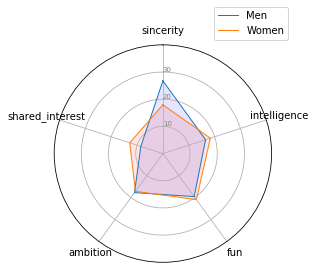

In [70]:
#Number of categories
categories=list(men_look_for)[1:]
N = len(categories)

#Now let's calculate the angle for each axis in the plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

#Initialize the spider plot
ax = plt.subplot(111, polar = True)

#Set the first axis on top
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

#Add plots
values_men = [np.mean(men_look_for.iloc[:, x]) for x in range(N)]
values_men += values_men[:1]

ax.plot(angles, values_men, linewidth=1, linestyle='solid', label="Men")
ax.fill(angles, values_men, 'b', alpha=0.1)

# Ind2
values_women = [np.mean(women_look_for.iloc[:, x]) for x in range(N)]
values_women += values_women[:1]
ax.plot(angles, values_women, linewidth=1, linestyle='solid', label="Women")
ax.fill(angles, values_women, 'r', alpha=0.1)


# Add legend
plt.legend(loc='right', bbox_to_anchor=(1.1, 1.1))